# ADS - Network analysis module, homework 1

In [1]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework1/lesmis.gml
G = nx.read_gml('lesmis.gml')

## Problem 1 (20% of credit) 
Visualize the network with node labes and sizes proportional to node degree

In [53]:
#G.node

In [40]:
labels={}
for key in G.node.keys():
    lab= G.node[key]['label']
    labels[key]=lab

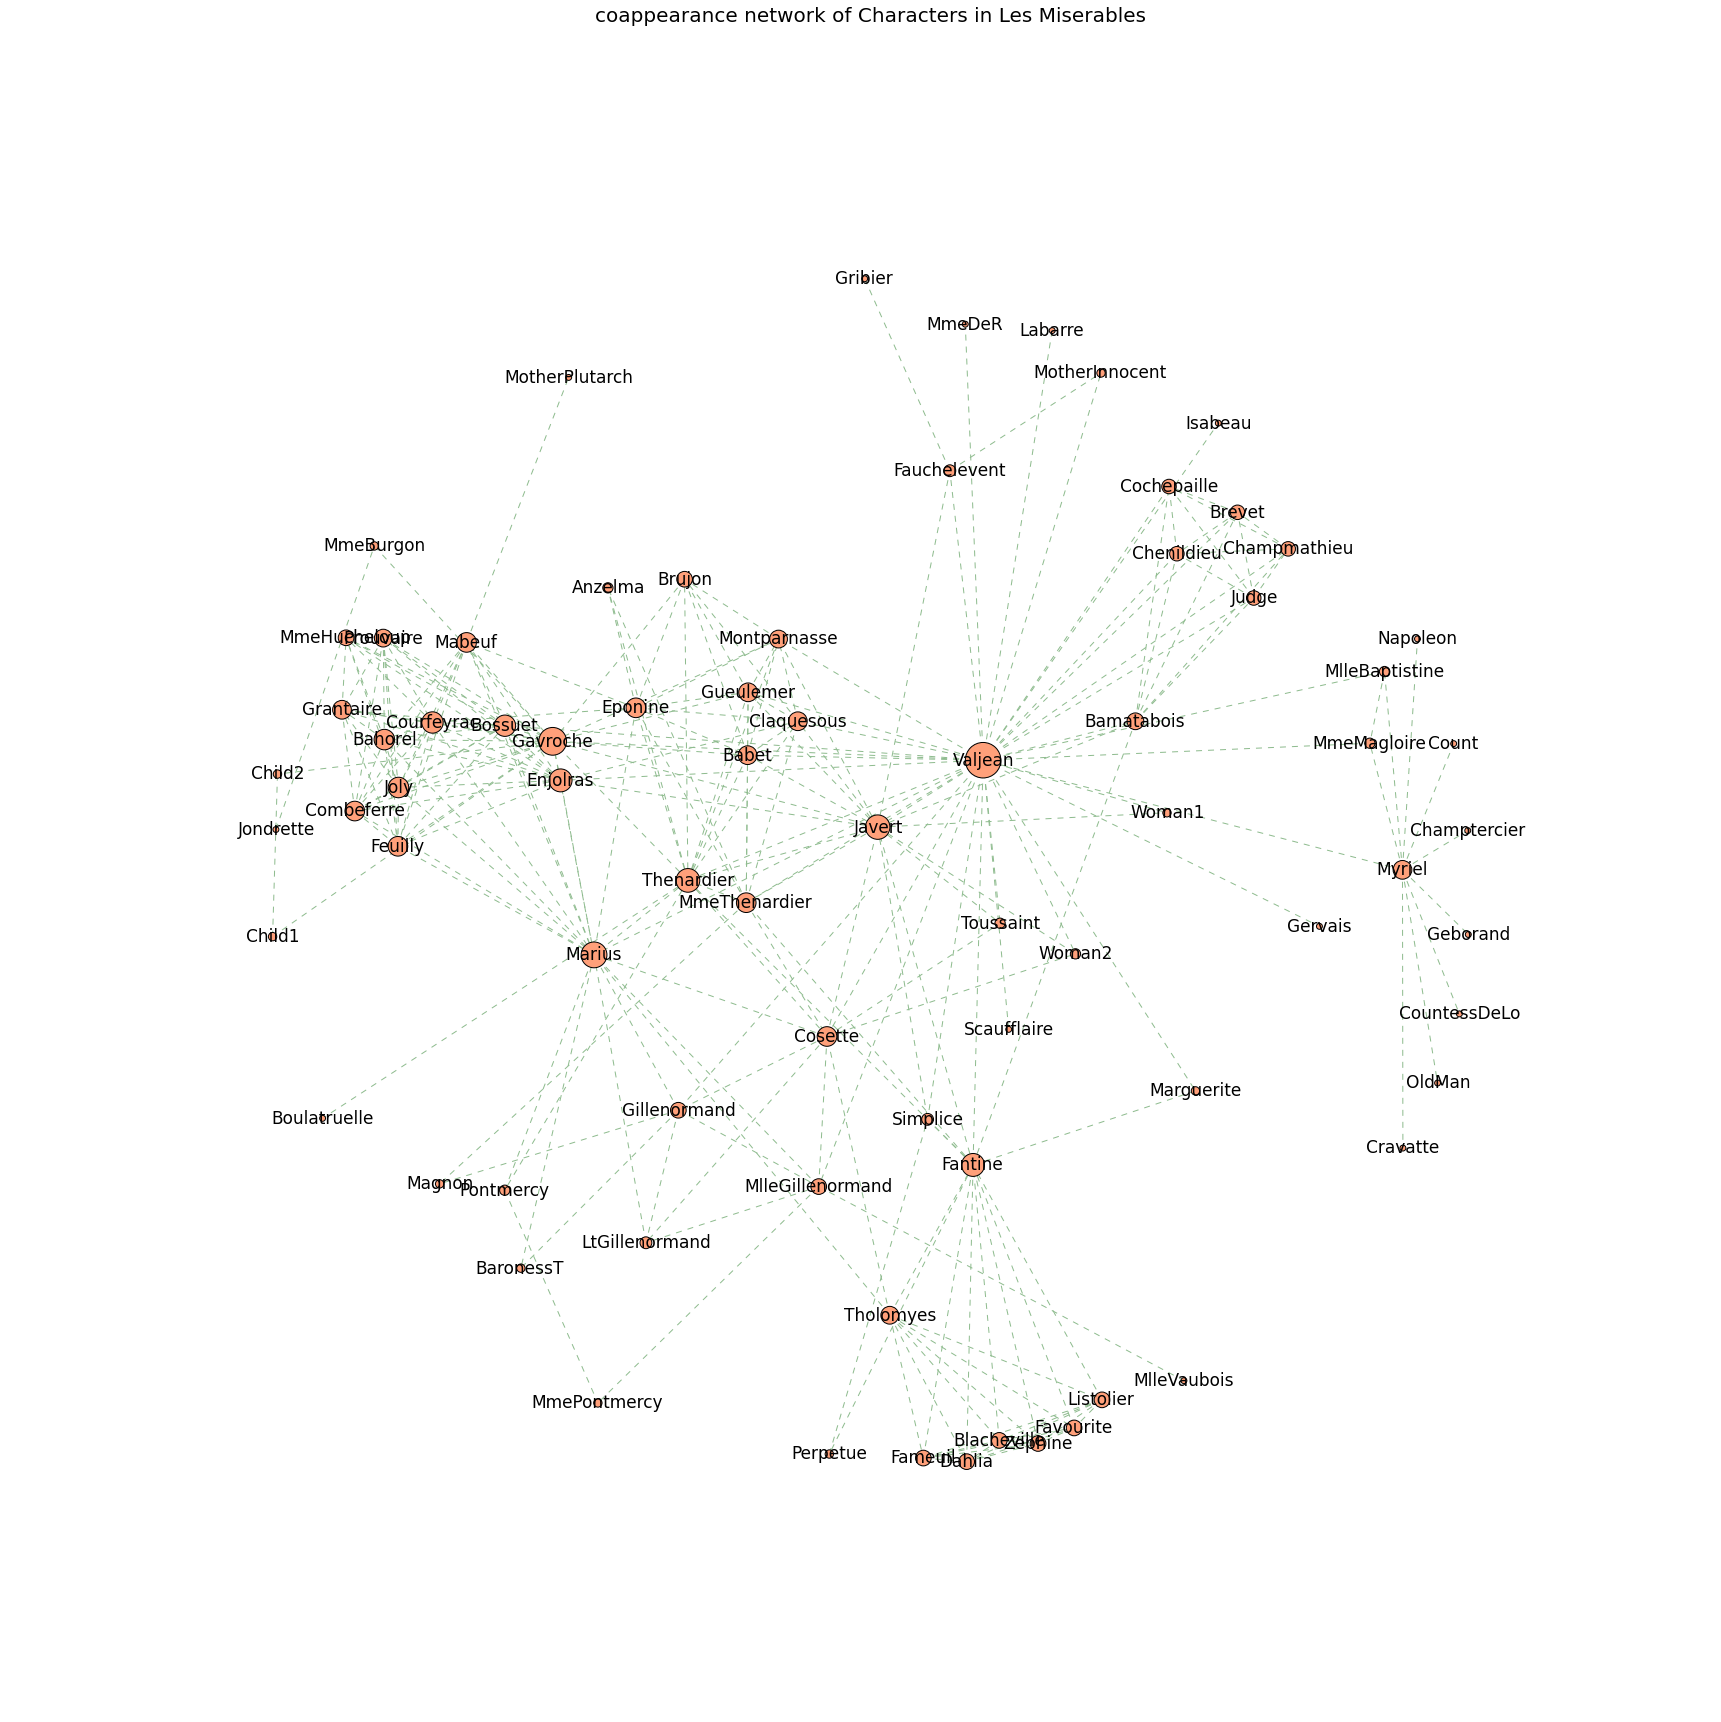

In [57]:
figure, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(
    G, 
    labels=labels, 
    #pos=nx.spring_layout(G, k=.13),
    #iterations=100,
    #ax=ax, 
    edge_color='#8fbc8f',
    style='dashed',
    node_size=np.array(G.degree().values())*35,
    node_color='#ffa07a',
    font_size=17
)
plt.axis('off')
ax.set_title('coappearance network of Characters in Les Miserables',size=20)

## Problem 2 (30% of credit)
Output the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) eigenvector centrality;

c) betweenness centrality;

d) closeness centrality;

In [83]:
#output top tn centrality scores and labels of a dictionary d2, given the dictionary d1
def topdict(d1,d2,tn):
    ind=sorted(d1, key=d1.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1}:{2}'.format(i+1,d2[ind[i]]['label'],d1[ind[i]]))

###Degree centrality

In [85]:
c1= nx.degree(G)
topdict(c1,G.node,5)

1|Valjean:36
2|Gavroche:22
3|Marius:19
4|Javert:17
5|Thenardier:16


###eigenvector centrality

In [86]:
c2= nx.eigenvector_centrality(G)
topdict(c2,G.node,5)

1|Gavroche:0.31783957195
2|Valjean:0.267615018
3|Enjolras:0.267179944486
4|Marius:0.259111666033
5|Bossuet:0.242132519653


###betweenness centrality

In [88]:
c3= nx.betweenness_centrality(G)
topdict(c3,G.node,5)

1|Valjean:0.569989052784
2|Myriel:0.176842105263
3|Gavroche:0.165112502426
4|Marius:0.132032488622
5|Fantine:0.129644540988


###closeness centrality

In [89]:
c4=nx.closeness_centrality(G)
topdict(c4,G.node,5)

1|Valjean:0.64406779661
2|Marius:0.531468531469
3|Thenardier:0.517006802721
4|Javert:0.517006802721
5|Gavroche:0.513513513514


## Problem 3 (25% of credit)
Analyze the impact of damping parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

So for the values of damping parameter between 0.4 and 0.95 top five nodes are the same, just the order is varied slightly (exactly the same between 0.7 and 0.85). For the values $\alpha=0.1-0.3$ node 55 is replaced with the node 25 in the top 5 list

In [108]:
#output indexes
def topdict2(d1,tn):
    list1=[]
    ind=sorted(d1, key=d1.get, reverse=True)
    for i in range(0,tn):
       list1.append(ind[i])
    return list1

In [119]:
params=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95]
A=[0, 0, 0, 0, 0]
Dif=[]
for param in params:
    c5 = nx.pagerank(G,param)
    print "Results for pagerank with parameter equal to ", param
    topdict(c5,G.node,5)
    print " "
    B=topdict2(c5,5)
    count=0
    for i in range(0, len(B)):
        if A[i]!=B[i]:
            count+=1
    A=B
    Dif.append(count)

Results for pagerank with parameter equal to  0.1
1|Valjean:0.0248704710949
2|Myriel:0.0209104237353
3|Gavroche:0.0157977634848
4|Thenardier:0.0151672203772
5|Javert:0.0150970872854
 
Results for pagerank with parameter equal to  0.2
1|Valjean:0.035419493802
2|Myriel:0.0274951200067
3|Gavroche:0.018583426528
4|Thenardier:0.0171858654261
5|Javert:0.0171489842896
 
Results for pagerank with parameter equal to  0.3
1|Valjean:0.0447492131531
2|Myriel:0.0329554662466
3|Gavroche:0.0213294965965
4|Javert:0.0191648838531
5|Thenardier:0.0190587765764
 
Results for pagerank with parameter equal to  0.4
1|Valjean:0.0529448267787
2|Myriel:0.037425254931
3|Gavroche:0.0240238928858
4|Javert:0.0211639052314
5|Marius:0.0209050257461
 
Results for pagerank with parameter equal to  0.5
1|Valjean:0.0600548187154
2|Myriel:0.0409702412016
3|Gavroche:0.0266583165639
4|Javert:0.0231621382824
5|Marius:0.0229752075528
 
Results for pagerank with parameter equal to  0.6
1|Valjean:0.0660813647846
2|Myriel:0.0435

(-0.5, 4)

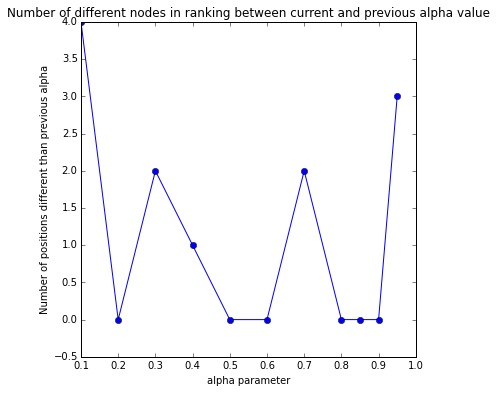

In [126]:
# Plot the results
figure, ax = plt.subplots(figsize=(6,6))
ax.plot(params, Dif, 'o-')
ax.set_title('Number of different nodes in ranking between current and previous alpha value')
ax.set_xlabel('alpha parameter')
ax.set_ylabel('Number of positions different than previous alpha')
ax.set_ylim([-0.5,4])

In the graphic, the x axis represents the value of the alpha parameter, while the y axis is the number of positions in the top 5 ranking which are different between the outcomes of the alpha value of the x axis and the previous alpha. In this case, the intervals 0.3 - 0.6 and 0.7-0.9 present no changes in the rankings

## Problem 4 (25% of credit) 
Analyze the degree distribution - visualize it and try to fit with a lognormal distribution.

In [147]:
def rankPlot(x):
  #visualize the rankplot for the array x, fitting it with a lognormal distribution
  #params - power-law fit cut-off
  xs=sorted(x,reverse=True) # sort the sequence in decreasing order
  plt.loglog(xs,'b-',marker='o') #create a log-log plot of the value vs its rank
  plt.title("Centrality rank plot") #plot title
  #axe labels  
  plt.ylabel("Centrality")
  plt.xlabel("rank")
  fp=[]                    
  xl=log(x[x>0])
  sigma=std(xl)
  mu=mean(xl)  
  fp=sigma
  s=exp(mu)*stat.lognorm.ppf((np.array(range(0,len(xl)+1))+0.5)/(len(xl)+1),sigma)[::-1]
  plt.loglog(s,'r-',marker='.')     
  plt.show()
  return fp  

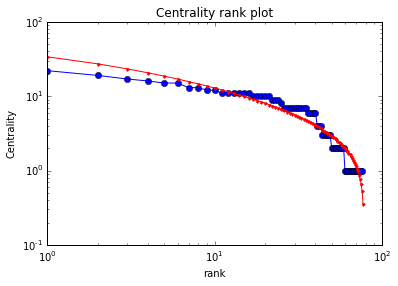

1.001930195522361

In [148]:
degrees=np.array(G.degree().values())
rankPlot(degrees)